In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [34]:
# Apply neural network with keras 
from numpy import loadtxt
import keras
import keras.utils
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from keras import utils as np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Pretty display for notebooks
%matplotlib inline

In [35]:
dataset = pd.read_csv('../input/heart-disease-dataset/heart.csv')

In [36]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [37]:
dataset.shape

(1025, 14)

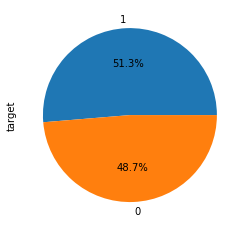

In [38]:
dataset['target'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

As shown in the plot, the distribution of 'heart disease' and 'no heart disease' is considered evenly distribute as there are no big difference in count. Hence, this dataset will produce a good model as it is not biased.

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

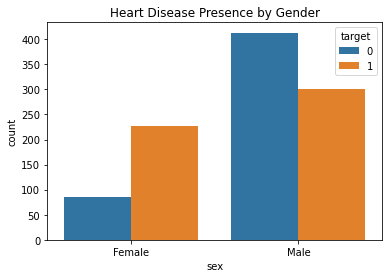

In [39]:
ax = sns.countplot(x='sex',hue='target',data=dataset)
ax.set_title('Heart Disease Presence by Gender')
ax.set_xticklabels(['Female','Male'])

From the bar chart, female tends to have higher risk to suffer from heart disease.

In [40]:
# split into input (X) and output (y) variables
X = dataset.drop(['target'], axis=1, inplace=False)
y = dataset['target']

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,                                
                                                    test_size = 0.25,shuffle=True,random_state = 11)#random_state = 4,5,8,11
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 768 samples.
Testing set has 257 samples.


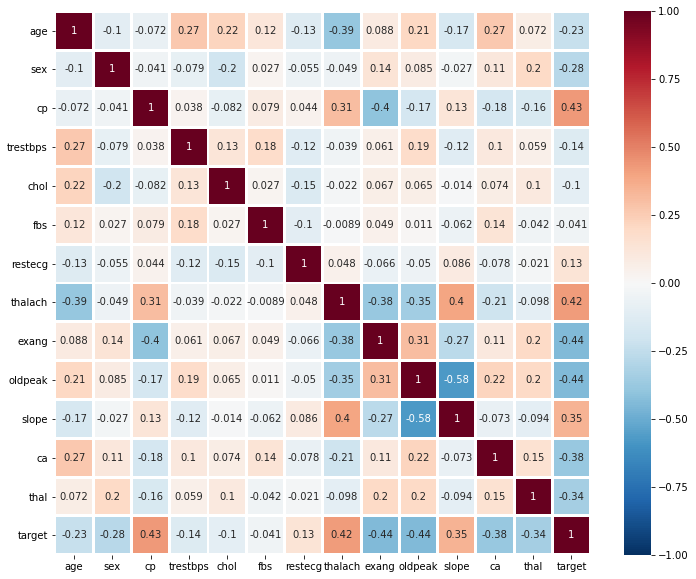

In [42]:
correlation = dataset.corr()

plt.figure(figsize=(12, 10))


heatmap = sns.heatmap(correlation, annot=True, linewidths=2, vmin=-1, cmap="RdBu_r")

In [43]:
from keras.layers import Dense, Dropout
# define the keras model
# You can change  num of hidden layers such as : model.add(Dense(256, activation='relu'))
# You can change  num of hidden nuerons Dense(32 or Dense(64 or Dense(128 
model = Sequential()
model.add(Dense(18, input_dim=13, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(21, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(8, activation='relu'))

# model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model .summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 18)                252       
_________________________________________________________________
dense_5 (Dense)              (None, 21)                399       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 176       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 836
Trainable params: 836
Non-trainable params: 0
_________________________________________________________________


In [44]:
# You can change learning rate 0.01 ,0.1, 0.005 
# momentum values from 0.1 to 0.9 
# compile the keras model
# Adagrad==87
"""opt=keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
    
)"""
"""opt=keras.optimizers.Adagrad(
    learning_rate=0.01,
    initial_accumulator_value=0.1,
    epsilon=1e-05,
    name="Adagrad")"""

opt=keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")


#keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta")'''
#opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.2)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [45]:
# Fit the model
history = model.fit(X_train, y_train,validation_split=0.15, epochs=150, batch_size=200)

# evaluate the model
scores = model.evaluate(X_train, y_train)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
4/4 [==============================] - 1s 75ms/step - loss: 0.6991 - accuracy: 0.4735 - val_loss: 0.6819 - val_accuracy: 0.4397
Epoch 2/150
4/4 [==============================] - 0s 20ms/step - loss: 0.6761 - accuracy: 0.5265 - val_loss: 0.6649 - val_accuracy: 0.5431
Epoch 3/150
4/4 [==============================] - 0s 20ms/step - loss: 0.6592 - accuracy: 0.5873 - val_loss: 0.6482 - val_accuracy: 0.6207
Epoch 4/150
4/4 [==============================] - 0s 20ms/step - loss: 0.6502 - accuracy: 0.5982 - val_loss: 0.6320 - val_accuracy: 0.6897
Epoch 5/150
4/4 [==============================] - 0s 20ms/step - loss: 0.6323 - accuracy: 0.6392 - val_loss: 0.6168 - val_accuracy: 0.7414
Epoch 6/150
4/4 [==============================] - 0s 20ms/step - loss: 0.6195 - accuracy: 0.6947 - val_loss: 0.6017 - val_accuracy: 0.7241
Epoch 7/150
4/4 [==============================] - 0s 19ms/step - loss: 0.6001 - accuracy: 0.7259 - val_loss: 0.5867 - val_accuracy: 0.7069
Epoch 8/150
4/4 [===

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


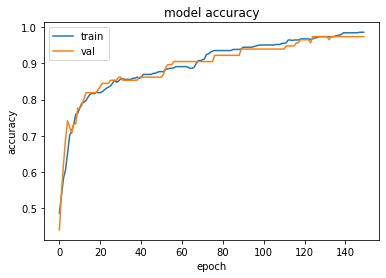

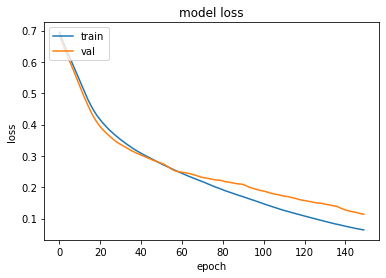

In [46]:
# Comparing Validation and training results
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [47]:
# evaluate the model
test_score = model.evaluate(X_test, y_test)
print("Testing Acc:", test_score[1])

9/9 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.9572
Testing Acc: 0.957198441028595


Confusion Matrix: 
 [[119   4]
 [  7 127]]


<AxesSubplot:>

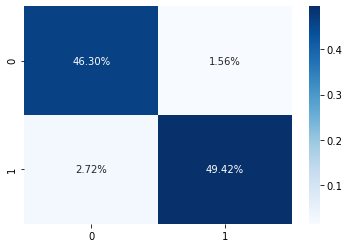

In [48]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred.round())
print("Confusion Matrix:", "\n", cm)


sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [49]:
tpr, fpr, threshold = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print("AUC-score:", auc_score)

AUC-score: 0.9938721029001334


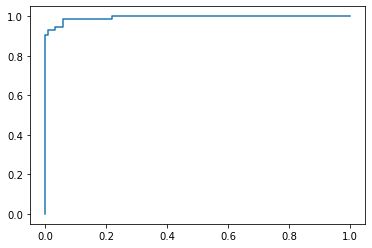

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(tpr, fpr)
plt.show()

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       123
           1       0.97      0.95      0.96       134

    accuracy                           0.96       257
   macro avg       0.96      0.96      0.96       257
weighted avg       0.96      0.96      0.96       257



# machne learning

In [52]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score,precision_score,recall_score

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn import metrics

# LogisticRegression

In [53]:
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)
predictions=logmodel.predict(X_test)


print(' Train Accuracy Score',logmodel.score(X_train, y_train))

print('accuracy_score',accuracy_score(y_test,predictions))
print('precision_score',precision_score(y_test,predictions))
print('recall_score',recall_score(y_test,predictions))
print('f1_score',f1_score(y_test,predictions))

print(classification_report(y_test, predictions))

 Train Accuracy Score 0.8645833333333334
accuracy_score 0.8599221789883269
precision_score 0.85
recall_score 0.8880597014925373
f1_score 0.8686131386861314
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       123
           1       0.85      0.89      0.87       134

    accuracy                           0.86       257
   macro avg       0.86      0.86      0.86       257
weighted avg       0.86      0.86      0.86       257



Confusion Matrix: 
 [[102  21]
 [ 15 119]]


<AxesSubplot:>

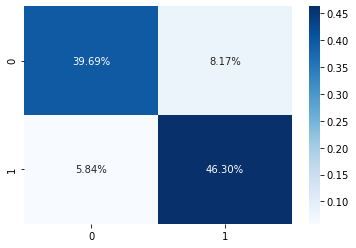

In [54]:
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:", "\n", cm)

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

# SVM

In [55]:
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'rbf', random_state = 0)
classifierSVM.fit(X_train, y_train)

print(' Train Accuracy Score',classifierSVM.score(X_train, y_train))

predictionsSVM=classifierSVM.predict(X_test)

print('accuracy_score',accuracy_score(y_test,predictionsSVM))
print('precision_score',precision_score(y_test,predictionsSVM))
print('recall_score',recall_score(y_test,predictionsSVM))
print('f1_score',f1_score(y_test,predictionsSVM))

print(classification_report(y_test, predictionsSVM))

 Train Accuracy Score 0.94921875
accuracy_score 0.9299610894941635
precision_score 0.9142857142857143
recall_score 0.9552238805970149
f1_score 0.9343065693430657
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       123
           1       0.91      0.96      0.93       134

    accuracy                           0.93       257
   macro avg       0.93      0.93      0.93       257
weighted avg       0.93      0.93      0.93       257



Confusion Matrix: 
 [[111  12]
 [  6 128]]


<AxesSubplot:>

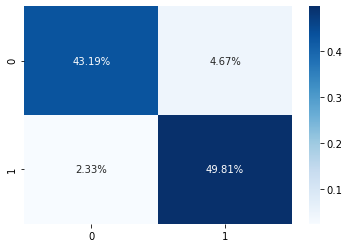

In [56]:
cm = confusion_matrix(y_test, predictionsSVM)
print("Confusion Matrix:", "\n", cm)

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_jobs=-1)
modelKNN.fit(X_train, y_train)
predictionKNN=modelKNN.predict(X_test)


print(' Train Accuracy Score',modelKNN.score(X_train, y_train))

print('accuracy_score',accuracy_score(y_test,predictionKNN))
print('precision_score',precision_score(y_test,predictionKNN))
print('recall_score',recall_score(y_test,predictionKNN))
print('f1_score',f1_score(y_test,predictionKNN))


print(classification_report(y_test, predictionKNN))

 Train Accuracy Score 0.9427083333333334
accuracy_score 0.8132295719844358
precision_score 0.7945205479452054
recall_score 0.8656716417910447
f1_score 0.8285714285714286
              precision    recall  f1-score   support

           0       0.84      0.76      0.79       123
           1       0.79      0.87      0.83       134

    accuracy                           0.81       257
   macro avg       0.82      0.81      0.81       257
weighted avg       0.82      0.81      0.81       257



Confusion Matrix: 
 [[ 93  30]
 [ 18 116]]


<AxesSubplot:>

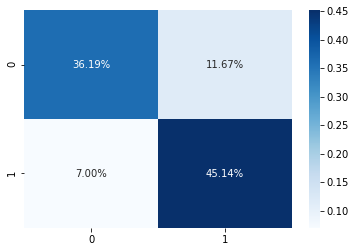

In [58]:
cm = confusion_matrix(y_test, predictionKNN)
print("Confusion Matrix:", "\n", cm)

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

# NB

In [59]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train,y_train)

predictionNB=gnb.predict(X_test)


print(' Train Accuracy Score',gnb.score(X_train, y_train))

print('accuracy_score',accuracy_score(y_test,predictionNB))
print('precision_score',precision_score(y_test,predictionNB))
print('recall_score',recall_score(y_test,predictionNB))
print('f1_score',f1_score(y_test,predictionNB))


print(classification_report(y_test, predictionNB))

 Train Accuracy Score 0.8346354166666666
accuracy_score 0.8210116731517509
precision_score 0.7933333333333333
recall_score 0.8880597014925373
f1_score 0.8380281690140846
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       123
           1       0.79      0.89      0.84       134

    accuracy                           0.82       257
   macro avg       0.83      0.82      0.82       257
weighted avg       0.83      0.82      0.82       257



Confusion Matrix: 
 [[ 92  31]
 [ 15 119]]


<AxesSubplot:>

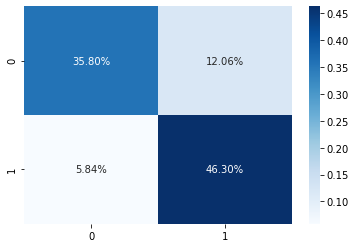

In [60]:
cm = confusion_matrix(y_test, predictionNB)
print("Confusion Matrix:", "\n", cm)

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

# DT

In [61]:
from sklearn import tree

#create an object of the model
clfDT = tree.DecisionTreeClassifier()
clfDT = clfDT.fit(X_train,y_train)




print(' Train Accuracy Score',clfDT.score(X_train, y_train))

#Prediction
predictionDT = clfDT.predict(X_test)

print('accuracy_score',accuracy_score(y_test,predictionDT))
print('precision_score',precision_score(y_test,predictionDT))
print('recall_score',recall_score(y_test,predictionDT))
print('f1_score',f1_score(y_test,predictionDT))



print(classification_report(y_test, predictionDT))

 Train Accuracy Score 1.0
accuracy_score 0.9922178988326849
precision_score 1.0
recall_score 0.9850746268656716
f1_score 0.9924812030075187
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       123
           1       1.00      0.99      0.99       134

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



Confusion Matrix: 
 [[123   0]
 [  2 132]]


<AxesSubplot:>

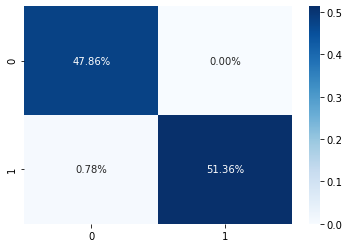

In [62]:
cm = confusion_matrix(y_test, predictionDT)
print("Confusion Matrix:", "\n", cm)

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

# RF

In [63]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier


#Create a Gaussian Classifier
clfRF=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF.fit(X_train,y_train)


print(' Train Accuracy Score',clfRF.score(X_train, y_train))

predictionRF=clfRF.predict(X_test)


print('accuracy_score',accuracy_score(y_test,predictionRF))
print('precision_score',precision_score(y_test,predictionRF))
print('recall_score',recall_score(y_test,predictionRF))
print('f1_score',f1_score(y_test,predictionRF))



print(classification_report(y_test, predictionRF))

 Train Accuracy Score 1.0
accuracy_score 1.0
precision_score 1.0
recall_score 1.0
f1_score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       134

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



Confusion Matrix: 
 [[123   0]
 [  0 134]]


<AxesSubplot:>

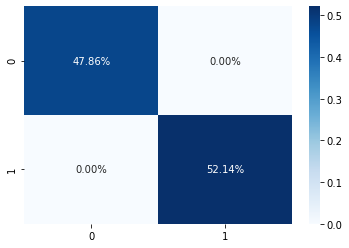

In [64]:
cm = confusion_matrix(y_test, predictionRF)
print("Confusion Matrix:", "\n", cm)

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')